In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
## independent and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
#encoding
y = y.map({'setosa':0,'versicolor':1,'virginica':2})
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
##train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.30, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
#classifier.fit(X_train,y_train)

In [10]:
##pre pruning
parameter = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter':['best', 'random']
}

In [11]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(classifier,parameter,cv=5, scoring='accuracy')
cv.fit(X_train, y_train)

C:\Users\Shahriar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shahriar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shahriar\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Shahriar\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [13]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [15]:
y_pred = cv.predict(X_test)

In [18]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'gini',max_depth= 5,max_features= 'log2',splitter = 'best')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='log2')

In [19]:
y_predn = classifier.predict(X_test)

[Text(0.5, 0.9166666666666666, 'X[0] <= 5.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.25, 0.75, 'X[1] <= 2.8\ngini = 0.323\nsamples = 36\nvalue = [29, 6, 1]'),
 Text(0.125, 0.5833333333333334, 'X[2] <= 2.15\ngini = 0.449\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.0625, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.1875, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.375, 0.5833333333333334, 'X[3] <= 1.05\ngini = 0.067\nsamples = 29\nvalue = [28, 1, 0]'),
 Text(0.3125, 0.4166666666666667, 'gini = 0.0\nsamples = 28\nvalue = [28, 0, 0]'),
 Text(0.4375, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.75, 0.75, 'X[3] <= 1.75\ngini = 0.525\nsamples = 69\nvalue = [2, 31, 36]'),
 Text(0.625, 0.5833333333333334, 'X[1] <= 3.6\ngini = 0.29\nsamples 

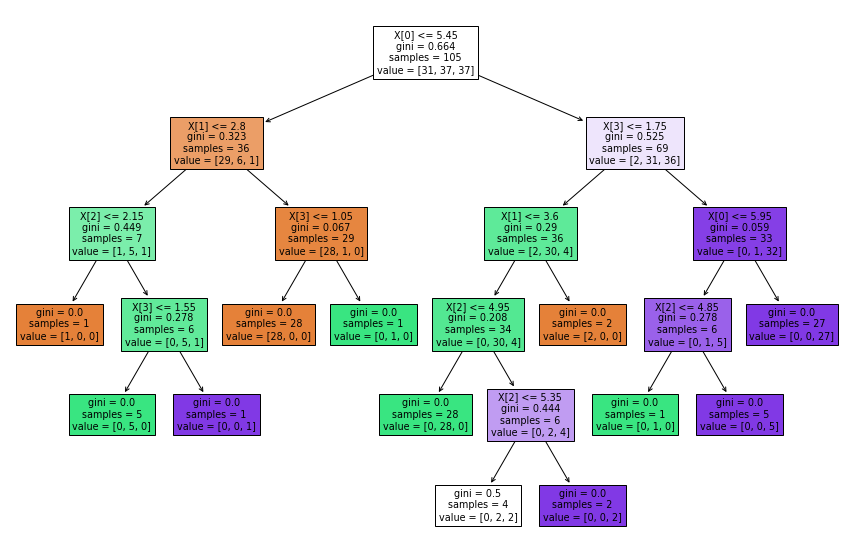

In [20]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [22]:
from sklearn.metrics import accuracy_score, classification_report

In [29]:
score = accuracy_score(y_predn,y_test)
print(score)

0.9777777777777777


In [25]:
print(classification_report(y_predn,y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

